# Example Understanding #

In [28]:
# Code for Wavelet Transform Examples

# Import necessary libraries
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import data
from PIL import Image


#  Time Series Wavelet Transform Example 

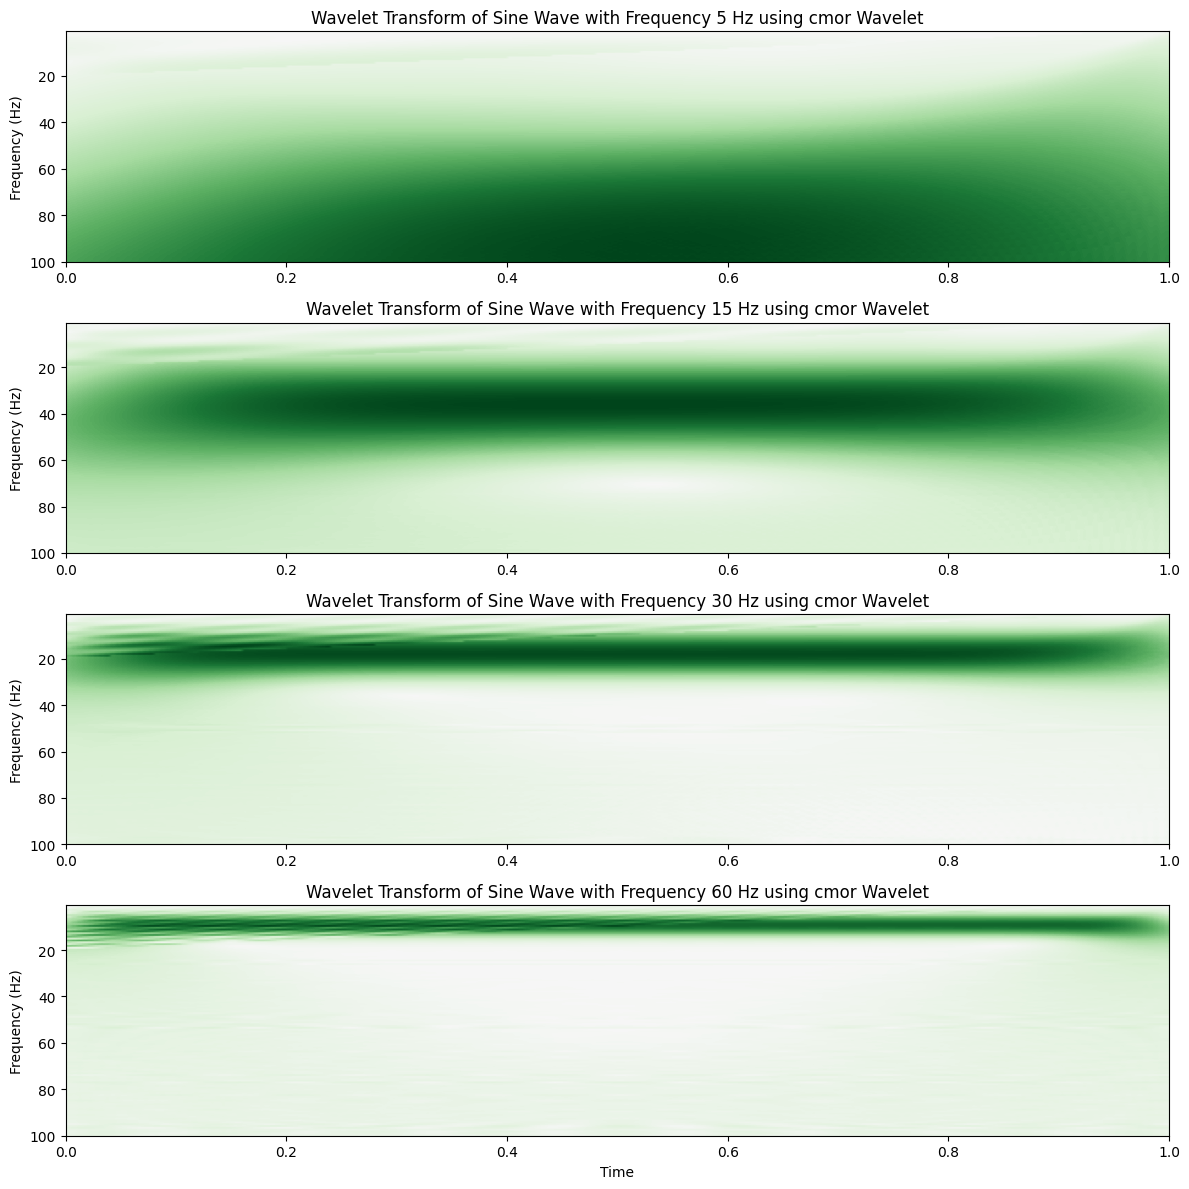

In [100]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

def wavelet_transform_time_series(frequency, wavelet_type):
    # Generate a sample time series with specified sine wave frequency
    t = np.linspace(0, 1, 200, endpoint=False)
    sin_wave = np.sin(frequency * t)
    noise = np.random.normal(0, 0.5, sin_wave.shape)
    time_series = sin_wave #+ noise

    # Apply Continuous Wavelet Transform
    scales = np.arange(1, 128)
    coefficients, frequencies = pywt.cwt(time_series, scales, wavelet_type, sampling_period=1/200)

    return coefficients, frequencies

# Frequencies for the sine waves
frequencies = [5, 15, 30, 60]

# Choose a different wavelet type
wavelet_type = 'cmor'  # Replace 'cmor' with 'haar' or another wavelet

# Create subplots
plt.figure(figsize=(12, 12))

for i, freq in enumerate(frequencies, 1):
    coefficients, freqs = wavelet_transform_time_series(freq, wavelet_type)
    
    # Plot the wavelet transform
    plt.subplot(4, 1, i)
    # Setting the yscale to frequencies using the scales provided by the CWT function
    scales = np.arange(1, 128)
    plt.imshow(np.abs(coefficients), extent=[0, 1, freqs[0], freqs[-1]], cmap='PRGn', aspect='auto',
               vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
    plt.title(f'Wavelet Transform of Sine Wave with Frequency {freq} Hz using {wavelet_type} Wavelet')
    plt.ylabel('Frequency (Hz)')

plt.xlabel('Time')
plt.tight_layout()
plt.show()


## Concatenated sine waves of different frequencies ##

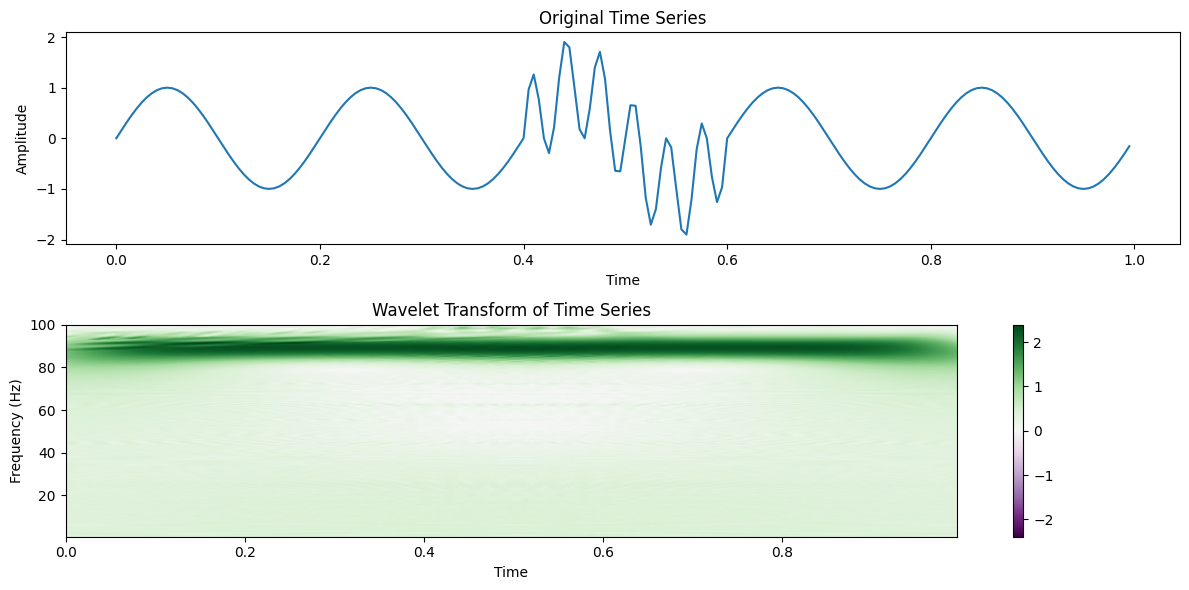

In [6]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Function to generate a time series with a sine wave and a higher frequency sine wave in the middle
def generate_time_series(low_freq, high_freq, high_freq_duration, total_duration=1, sampling_rate=200):
    t = np.linspace(0, total_duration, int(total_duration * sampling_rate), endpoint=False)
    # Create the low frequency sine wave
    time_series = np.sin(2 * np.pi * low_freq * t)
    
    # Calculate the start and end points for the high frequency sine wave
    start = int((total_duration - high_freq_duration) / 2 * sampling_rate)
    end = start + int(high_freq_duration * sampling_rate)
    
    # Add the high frequency sine wave in the middle
    time_series[start:end] += np.sin(2 * np.pi * high_freq * t[start:end])
    
    return t, time_series

# Generate the time series
t, time_series = generate_time_series(low_freq=5, high_freq=30, high_freq_duration=0.2)

# Apply Continuous Wavelet Transform
scales = np.arange(1, 200)
coefficients, frequencies = pywt.cwt(time_series, scales, 'cmor', sampling_period=1/200)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the original time series
plt.subplot(2, 1, 1)
plt.plot(t, time_series)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the wavelet transform
plt.subplot(2, 1, 2)
plt.imshow(np.abs(coefficients), extent=[0, t[-1], frequencies[-1], frequencies[0]], cmap='PRGn', aspect='auto',
           vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
plt.title('Wavelet Transform of Time Series')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.colorbar()

plt.tight_layout()
plt.show()


#  Image Wavelet Transform Example #

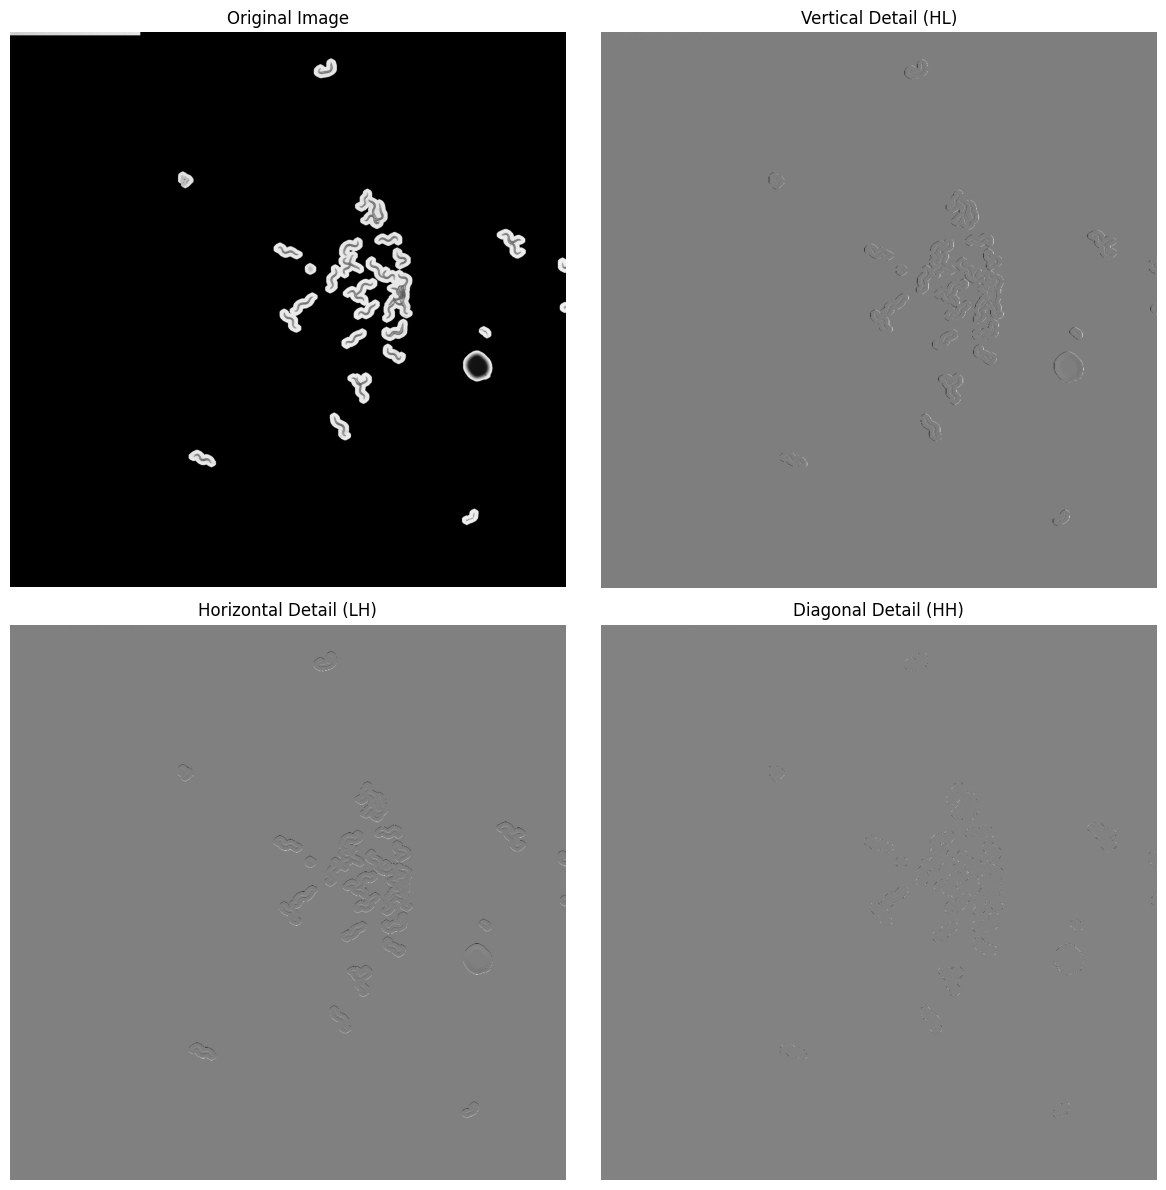

Approximation Coefficients (LL):
       0      1      2      3      4      5      6      7      8      9     \
0     185.0  181.0  185.5  182.0  182.5  181.0  180.0  183.5  184.0  181.5   
1     186.5  184.0  188.5  187.5  186.5  186.5  187.5  186.5  187.5  183.0   
2     186.5  185.0  190.0  188.0  187.5  185.0  187.0  189.5  188.0  185.5   
3     184.5  189.0  187.5  186.5  188.0  189.5  188.0  187.5  185.0  184.0   
4     188.5  186.0  189.5  184.5  186.5  186.0  184.0  187.5  185.0  184.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1019    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1020    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1021    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1022    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1023    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  1014  1015  1016  1

In [27]:
import pandas as pd

def wavelet_transform_image():
    # Load a sample image
    # Load an image from the specified path
    image = Image.open('/Users/emmarusconi/Desktop/003500.jpg')
    image = np.array(image)

    # Apply 2D Discrete Wavelet Transform
    coeffs2 = pywt.dwt2(image, 'haar')
    LL, (LH, HL, HH) = coeffs2

    # Visualize the original image and its decomposition
    plt.figure(figsize=(12, 12))

    # Original Image
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Approximation coefficients
    plt.subplot(2, 2, 2)
    plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail (HL)')
    plt.axis('off')

    # Horizontal detail coefficients
    plt.subplot(2, 2, 3)
    plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail (LH)')
    plt.axis('off')

    # Vertical detail coefficients
    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail (HH)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Convert coefficients to pandas DataFrames for a nicer display
    print("Approximation Coefficients (LL):")
    print(pd.DataFrame(LL))

    print("\nHorizontal Detail Coefficients (LH):")
    print(pd.DataFrame(LH))

    print("\nVertical Detail Coefficients (HL):")
    print(pd.DataFrame(HL))

    print("\nDiagonal Detail Coefficients (HH):")
    print(pd.DataFrame(HH))

# Call the functions to run the examples
wavelet_transform_image()

